# Goal: Energy/Renewable Industry Outlook:


1. Assess the global energy transition trends, focusing on decarbonization, electrification, and energy storage innovations.

2. Evaluate leading renewable and hybrid energy players on project pipelines, capex trends, and technology adoption (solar, wind, hydrogen, etc.).

3. Analyze regulatory and geopolitical drivers, including ESG mandates, carbon pricing, and energy security policies.

4. Track capital flows, government incentives, and private investment shaping market competitiveness and scalability.

5. Deliver insights on risk factors and growth opportunities, including grid modernization, interconnection delays, and emerging markets expansion.

In [1]:
import yfinance as yf
import pandas as pd
import time

# List of top 20 Renewable Enegy company ticker symbols
companies = [
    'XOM',  # ExxonMobil
    'GEV', #GE Vernova, previously GE Power
    'CVX',  # Chevron
    'NEE',  # NextEra Energy
    'DUK',  # Duke Energy
    'SO',   # Southern Company
    'ENB',  # Enbridge
    'BP',   # BP Plc
    'TTE',  # TotalEnergies
    'EQNR', # Equinor
    'ORSTED.CO', # Orsted A/S
    'VWS.CO',    # Vestas Wind Systems
    'ED',   # Consolidated Edison
    'D',    # Dominion Energy
    'PCG',  # Pacific Gas & Electric
    'PEG',  # Public Service Enterprise Group
    'BEP',  # Brookfield Renewable Partners
    'BE',   # Bloom Energy
    'FSLR', # First Solar
    'RUN',  # Sunrun Inc
    'NRG'
]

# Define the metrics we want to collect
metrics = [
    'shortName', 'marketCap', 'trailingPE', 'forwardPE', 'priceToBook', 'dividendYield',
    'revenue', 'grossProfits', 'freeCashflow', 'fullTimeEmployees', 'industry',
    'longBusinessSummary', 'operatingMargins'
]

# Create an empty DataFrame to store the financial data
financial_data = pd.DataFrame(columns=['Company', 'last_traded_price', 'sales_margin_%'] + metrics)

# Pull financial data for each company and add it to the DataFrame
for ticker in companies:
    try:
        company = yf.Ticker(ticker)
        info = company.info
        hist = company.history(period='1d')  # Get last traded price

        # Create a row of data for each company, handling missing 'shortName' keys
        row = {metric: info.get(metric, 'N/A') for metric in metrics}
        row['Company'] = info.get('shortName', ticker)  # Use the ticker symbol if 'shortName' is missing

        # Get last traded price (closing price)
        row['last_traded_price'] = hist['Close'].values[0] if not hist.empty else 'N/A'

        # Calculate sales margin % (operating margin * 100)
        row['sales_margin_%'] = f"{info.get('operatingMargins', 0) * 100:.2f}%" if info.get('operatingMargins') else 'N/A'

        # Append the row to the DataFrame using pd.concat, ensuring the row is not empty
        if any(value != 'N/A' for value in row.values()):  # Check if at least one value is not 'N/A'
            financial_data = pd.concat([financial_data, pd.DataFrame([row])], ignore_index=True)

        # Delay to avoid rate-limiting issues
        time.sleep(2)  # 2 seconds delay between requests

    except Exception as e:
        print(f"Error retrieving data for {ticker}: {e}")

# Convert marketCap to numeric values and handle missing data
financial_data['marketCap'] = pd.to_numeric(financial_data['marketCap'], errors='coerce')

# Sort the DataFrame by marketCap in descending order
financial_data = financial_data.sort_values(by='marketCap', ascending=False)

# Format marketCap as currency (e.g., $100B)
financial_data['marketCap'] = financial_data['marketCap'].apply(lambda x: f"${x:,.0f}" if pd.notna(x) else 'N/A')

# Display the sorted and formatted DataFrame
pd.set_option('display.max_columns', None)  # Display all columns in the DataFrame
display(financial_data)

# Optional: Save the DataFrame to a CSV file
#financial_data.to_csv('top_33_healthcare_companies_sorted_financials.csv', index=False)


<ipython-input-1-1928bb5e1ed4>:59: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  financial_data = pd.concat([financial_data, pd.DataFrame([row])], ignore_index=True)


,Company,last_traded_price,sales_margin_%,shortName,marketCap,trailingPE,forwardPE,priceToBook,dividendYield,revenue,grossProfits,freeCashflow,fullTimeEmployees,industry,longBusinessSummary,operatingMargins
0,Exxon Mobil Corporation,103.029999,12.76%,Exxon Mobil Corporation,"$444,022,226,944",13.664456,13.091487,1.690097,3.84,N/A,105007996928,21801000960,61000,Oil & Gas Integrated,Exxon Mobil Corporation engages in the explora...,0.12764
2,Chevron Corporation,136.539993,10.60%,Chevron Corporation,"$236,518,670,336",15.60457,12.367753,1.597744,5.01,N/A,75975000064,13518749696,45298,Oil & Gas Integrated,"Chevron Corporation, through its subsidiaries,...",0.10595
3,"NextEra Energy, Inc.",67.760002,36.61%,"NextEra Energy, Inc.","$139,492,769,792",25.378277,18.413044,2.800347,3.34,N/A,15374000128,-11337249792,16800,Utilities - Regulated Electric,"NextEra Energy, Inc., through its subsidiaries...",0.36610
8,TotalEnergies SE,57.889999,12.76%,TotalEnergies SE,"$128,633,896,960",9.696817,7.120541,1.089817,6.69,N/A,66887000064,14687375360,95393,Oil & Gas Integrated,"TotalEnergies SE, a multi-energy company, prod...",0.12756
1,GE Vernova Inc.,464.390015,2.83%,GE Vernova Inc.,"$126,748,295,168",66.626976,67.302900,14.726178,0.22,N/A,6610999808,4210374912,76800,Specialty Industrial Machinery,"GE Vernova Inc., an energy company, engages in...",0.02826
10,ORSTED A/S,266.399994,29.31%,ORSTED A/S,"$111,950,602,240",99.033455,9.669691,1.705462,N/A,N/A,36010999808,-36059623424,8251,Utilities - Renewable,"Ørsted A/S, together with its subsidiaries, ow...",0.29307
11,Vestas Wind Systems A/S,101.349998,0.40%,Vestas Wind Systems A/S,"$102,120,259,584",24.246412,337.833300,30.536306,0.54,N/A,2172000000,1835000064,35927,Specialty Industrial Machinery,"Vestas Wind Systems A/S engages in the design,...",0.00404
6,Enbridge Inc,46.060001,20.24%,Enbridge Inc,"$100,412,645,376",23.620512,21.523365,1.634319,5.86,N/A,25945999360,3365874944,14500,Oil & Gas Midstream,"Enbridge Inc., together with its subsidiaries,...",0.20236
5,Southern Company (The),89.639999,27.82%,Southern Company (The),"$98,621,030,400",21.496403,20.749998,2.911429,3.3,N/A,13838999552,407249984,28314,Utilities - Regulated Electric,"The Southern Company, through its subsidiaries...",0.27820
4,Duke Energy Corporation (Holdin,116.489998,28.33%,Duke Energy Corporation (Holdin,"$90,542,669,824",19.350498,18.373816,1.821295,3.59,N/A,15747999744,-2420750080,26413,Utilities - Regulated Electric,"Duke Energy Corporation, through its subsidiar...",0.28331


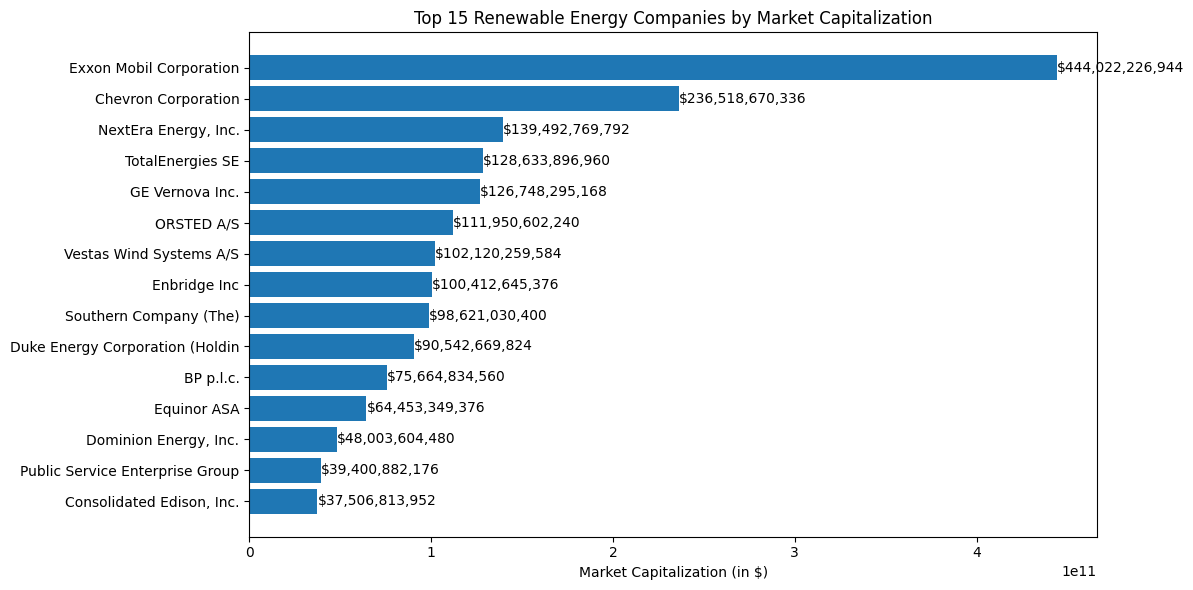

In [2]:
import matplotlib.pyplot as plt

# Sort the data by marketCap and take the top 10 companies
top_companies = financial_data.head(15)

# Convert the marketCap column to a numeric format for plotting
market_caps = top_companies['marketCap'].apply(lambda x: float(x.replace('$', '').replace(',', '')))

# Plot a bar chart for the top 10 companies by market capitalization
plt.figure(figsize=(12, 6))
bars = plt.barh(top_companies['Company'], market_caps)

# Add the market capitalization values on the bars
for index, bar in enumerate(bars):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f"${market_caps.iloc[index]:,.0f}", va='center')

# Set labels and title
plt.xlabel('Market Capitalization (in $)')
plt.title('Top 15 Renewable Energy Companies by Market Capitalization')
plt.gca().invert_yaxis()  # Invert the y-axis to show the largest company at the top

# Display the plot
plt.tight_layout()
plt.show()


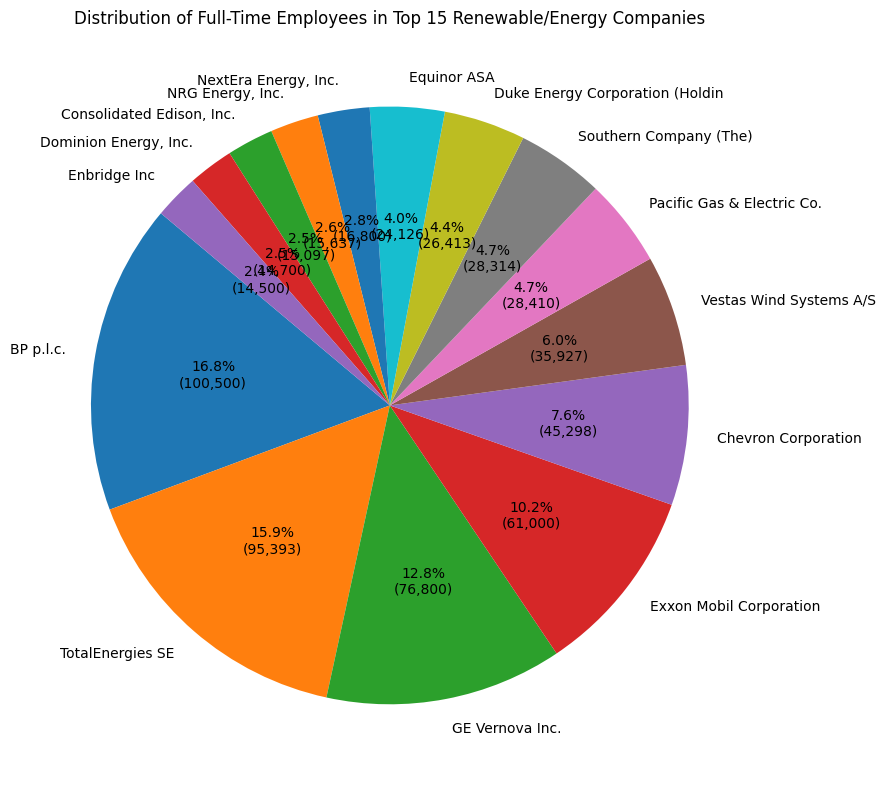

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Drop any rows where fullTimeEmployees is 'N/A' and convert the column to numeric
employee_data = financial_data[financial_data['fullTimeEmployees'] != 'N/A']
employee_data['fullTimeEmployees'] = pd.to_numeric(employee_data['fullTimeEmployees'], errors='coerce')

# Take the top 10 companies with the highest number of employees
top_employers = employee_data.nlargest(15, 'fullTimeEmployees')

# Function to display both percentage and number of employees in each pie chart slice
def pie_label_func(pct, all_values):
    absolute = int(np.round(pct / 100. * np.sum(all_values)))
    return f"{pct:.1f}%\n({absolute:,})"

# Plot a pie chart
plt.figure(figsize=(9, 9))
plt.pie(
    top_employers['fullTimeEmployees'],
    labels=top_employers['Company'],
    autopct=lambda pct: pie_label_func(pct, top_employers['fullTimeEmployees']),
    startangle=140
)
plt.title('Distribution of Full-Time Employees in Top 15 Renewable/Energy Companies')
plt.tight_layout()
plt.show()


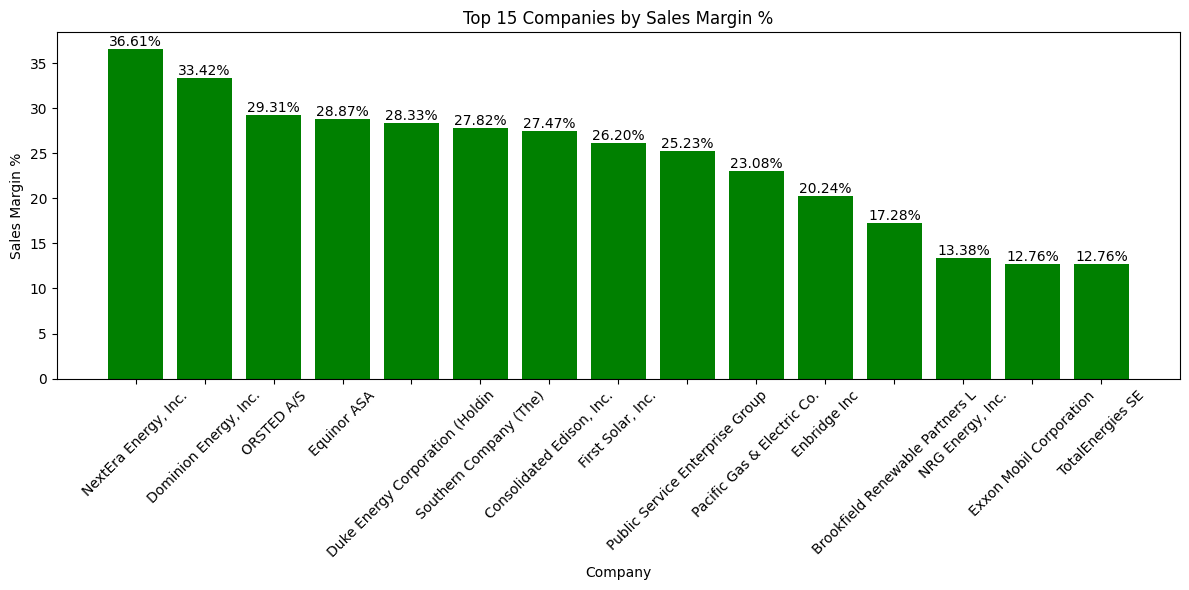

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure 'N/A' is replaced with NaN and convert sales_margin_% to string type first
financial_data['sales_margin_%'] = financial_data['sales_margin_%'].replace('N/A', np.nan)

# Convert only valid string entries, ignoring NaN, and strip the '%' symbol
financial_data['sales_margin_%'] = financial_data['sales_margin_%'].apply(
    lambda x: str(x).rstrip('%') if isinstance(x, str) else x
).astype('float')

# Take the top 10 companies based on sales margin %
top_sales_margin = financial_data.nlargest(15, 'sales_margin_%')

# Plot a bar chart with expanded x-axis
plt.figure(figsize=(12, 6))  # Expand the width of the figure for better readability
bars = plt.bar(top_sales_margin['Company'], top_sales_margin['sales_margin_%'], color='green')

# Add labels to the bars to show the exact values of sales margin %
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Company')
plt.ylabel('Sales Margin %')
plt.title('Top 15 Companies by Sales Margin %')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust the layout to prevent labels from being cut off
plt.show()


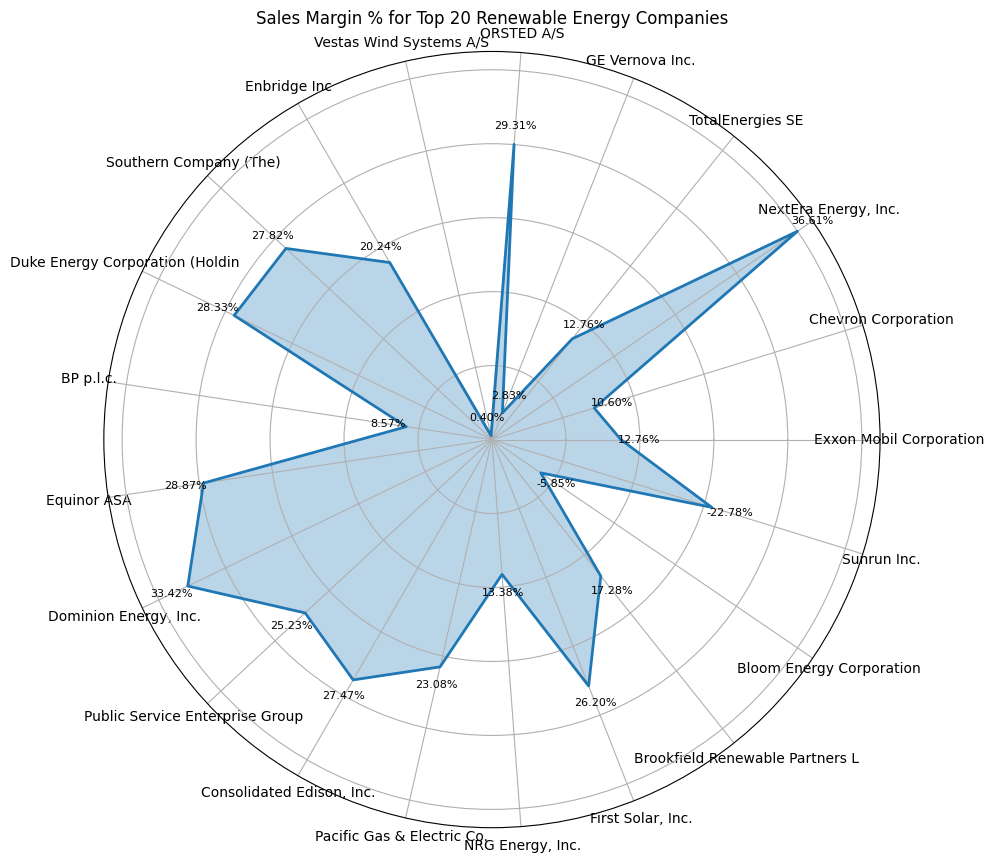

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have loaded your DataFrame `financial_data` with a 'Company' and 'sales_margin_%' columns.

# Step 1: Extract only the necessary columns
df = financial_data[['Company', 'sales_margin_%']].copy()

# Step 2: Replace 'N/A' with NaN, convert to string for replacement, then fill NaN with 0
df['sales_margin_%'] = df['sales_margin_%'].replace('N/A', np.nan).astype(str).str.replace('%', '')
df['sales_margin_%'] = pd.to_numeric(df['sales_margin_%'], errors='coerce').fillna(0)

# Step 3: Use the absolute value of sales margin for normalization
df['abs_sales_margin'] = df['sales_margin_%'].abs()
max_sales_margin = df['abs_sales_margin'].max()
df['normalized_sales_margin'] = df['abs_sales_margin'] / max_sales_margin

# Step 4: Prepare data for radar chart
labels = df['Company'].tolist()  # List of companies for the radar chart
num_vars = len(labels)

# Define the angle of each axis in the plot (equal distribution of angles)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "close the plot" by appending the first element to the end
values = df['normalized_sales_margin'].tolist()
values += values[:1]
angles += angles[:1]

# Step 5: Plot the radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Plot the normalized sales margin for each company
ax.plot(angles, values, linewidth=2, linestyle='solid', label='Sales Margin % (Normalized)')
ax.fill(angles, values, alpha=0.3)

# Set the category labels
ax.set_yticklabels([])  # Hide radial labels
ax.set_xticks(angles[:-1])  # Skip the last angle for labels
ax.set_xticklabels(labels, fontsize=10, rotation=45)

# Add annotations for each original sales margin percentage
for i, (angle, value, margin) in enumerate(zip(angles, values, df['sales_margin_%'].tolist())):
    # Adjust position for label slightly away from the plotted point
    ax.text(angle, value + 0.05, f"{margin:.2f}%", ha='center', va='center', fontsize=8, color='black')

# Add a title
plt.title("Sales Margin % for Top 20 Renewable Energy Companies", pad=20)

# Show the plot
plt.tight_layout()
plt.show()

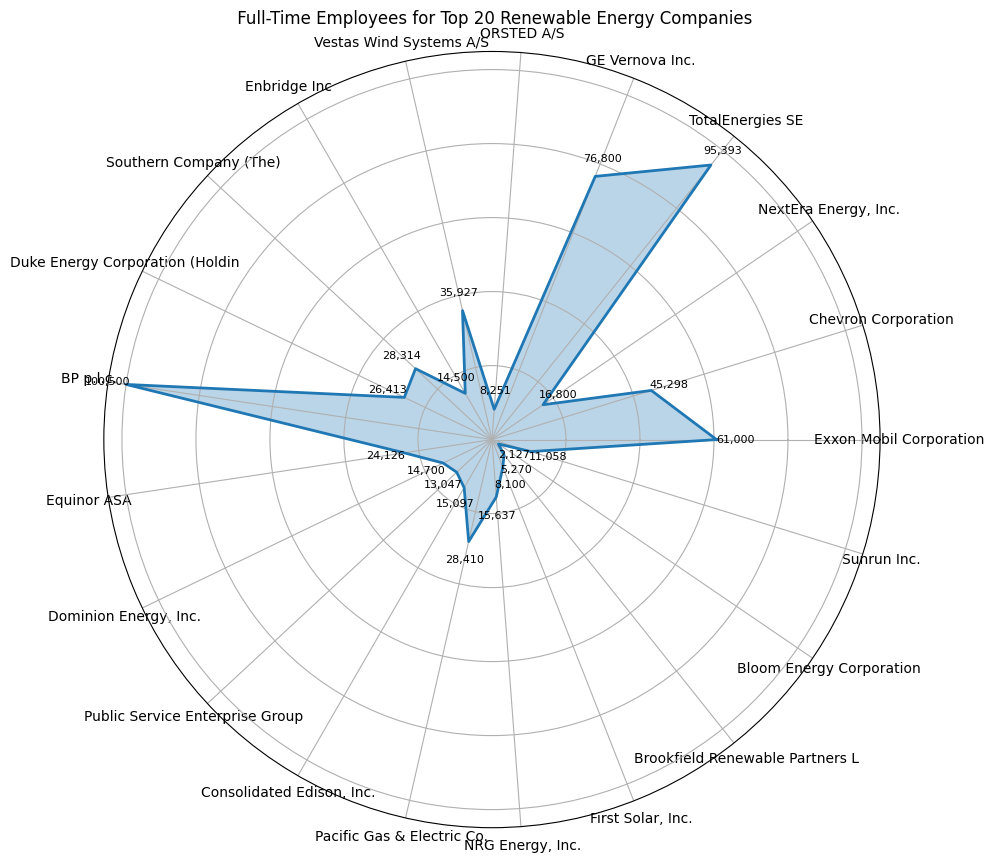

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have loaded your DataFrame `financial_data` with 'Company' and 'fullTimeEmployees' columns.

# Step 1: Extract only the necessary columns
df = financial_data[['Company', 'fullTimeEmployees']].copy()

# Step 2: Replace 'N/A' with NaN and then fill NaN with 0
df['fullTimeEmployees'] = pd.to_numeric(df['fullTimeEmployees'], errors='coerce').fillna(0)

# Step 3: Normalize the full-time employees for the radar chart
max_employees = df['fullTimeEmployees'].max()
df['normalized_employees'] = df['fullTimeEmployees'] / max_employees

# Step 4: Prepare data for radar chart
labels = df['Company'].tolist()  # List of companies for the radar chart
num_vars = len(labels)

# Define the angle of each axis in the plot (equal distribution of angles)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "close the plot" by appending the first element to the end
values = df['normalized_employees'].tolist()
values += values[:1]
angles += angles[:1]

# Step 5: Plot the radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Plot the normalized full-time employees for each company
ax.plot(angles, values, linewidth=2, linestyle='solid', label='Full-Time Employees (Normalized)')
ax.fill(angles, values, alpha=0.3)

# Set the category labels
ax.set_yticklabels([])  # Hide radial labels
ax.set_xticks(angles[:-1])  # Skip the last angle for labels
ax.set_xticklabels(labels, fontsize=10, rotation=45)

# Add annotations for each full-time employee count
for i, (angle, value, employee_count) in enumerate(zip(angles, values, df['fullTimeEmployees'].tolist())):
    # Adjust position for label slightly away from the plotted point
    ax.text(angle, value + 0.05, f"{int(employee_count):,}", ha='center', va='center', fontsize=8, color='black')

# Add a title
plt.title(" Full-Time Employees for Top 20 Renewable Energy Companies", pad=20)

# Show the plot
plt.tight_layout()
plt.show()


In [16]:
import pandas as pd

# Check if 'marketCap' column is not already numeric, and convert if necessary
if financial_data['marketCap'].dtype != 'float64' and financial_data['marketCap'].dtype != 'int64':
    # Remove any non-numeric characters if needed
    financial_data['marketCap'] = pd.to_numeric(financial_data['marketCap'].str.replace('[\$,]', '', regex=True), errors='coerce')
else:
    financial_data['marketCap'] = pd.to_numeric(financial_data['marketCap'], errors='coerce')

# Similarly, ensure 'fullTimeEmployees' is numeric
financial_data['fullTimeEmployees'] = pd.to_numeric(financial_data['fullTimeEmployees'], errors='coerce')

# Drop rows with missing values in 'marketCap' or 'fullTimeEmployees' for accuracy in sums
financial_data = financial_data.dropna(subset=['marketCap', 'fullTimeEmployees'])

# Group by industry and calculate the total market cap and headcount per industry
industry_summary = financial_data.groupby('industry').agg(
    total_market_cap=pd.NamedAgg(column='marketCap', aggfunc='sum'),
    total_headcount=pd.NamedAgg(column='fullTimeEmployees', aggfunc='sum')
).reset_index()

# Calculate overall totals
total_market_cap = industry_summary['total_market_cap'].sum()
total_headcount = industry_summary['total_headcount'].sum()

# Add percentage splits for market cap and headcount for each industry
industry_summary['market_cap_%'] = (industry_summary['total_market_cap'] / total_market_cap) * 100
industry_summary['headcount_%'] = (industry_summary['total_headcount'] / total_headcount) * 100

# Sort by 'total_market_cap' in descending order
industry_summary = industry_summary.sort_values(by='total_market_cap', ascending=False)

# Format 'total_market_cap' as currency (e.g., "$100B") and 'total_headcount' with commas
industry_summary['total_market_cap'] = industry_summary['total_market_cap'].apply(lambda x: f"${x / 1e9:,.2f}B")
industry_summary['total_headcount'] = industry_summary['total_headcount'].apply(lambda x: f"{x:,.0f}")

# Add overall totals as the last row
overall_totals = pd.DataFrame({
    'industry': ['Total'],
    'total_market_cap': [f"${total_market_cap / 1e9:,.2f}B"],
    'total_headcount': [f"{total_headcount:,.0f}"],
    'market_cap_%': [100.0],
    'headcount_%': [100.0]
})

# Append overall totals to the summary DataFrame
industry_summary = pd.concat([industry_summary, overall_totals], ignore_index=True)

# Rename columns to replace 'headcount' with 'workforce'
industry_summary = industry_summary.rename(columns={
    'total_headcount': 'total_workforce',
    'headcount_%': 'workforce_%'
})

# Display the result
pd.options.display.float_format = '{:,.2f}'.format
display(industry_summary)


# # Display the result
# pd.options.display.float_format = '{:,.2f}'.format
# display(industry_summary)

,industry,total_market_cap,total_workforce,market_cap_%,workforce_%
0,Oil & Gas Integrated,$949.29B,"326,317",48.66,50.45
1,Utilities - Regulated Electric,$491.04B,"142,781",25.17,22.08
2,Specialty Industrial Machinery,$228.87B,"112,727",11.73,17.43
3,Utilities - Renewable,$127.30B,"13,521",6.53,2.09
4,Oil & Gas Midstream,$100.41B,"14,500",5.15,2.24
5,Utilities - Independent Power Producers,$30.86B,"15,637",1.58,2.42
6,Solar,$18.56B,"19,158",0.95,2.96
7,Electrical Equipment & Parts,$4.52B,"2,127",0.23,0.33
8,Total,"$1,950.85B","646,768",100.00,100.00


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame similar to your data
# Assuming 'financial_data' is the DataFrame containing the necessary columns

# Step 1: Preprocess data
# Replace 'N/A' with NaN, remove '%' sign, convert to numeric, and fill NaNs with 0
financial_data['sales_margin_%'] = financial_data['sales_margin_%'].replace('N/A', np.nan).astype(str).str.replace('%', '')
financial_data['sales_margin_%'] = pd.to_numeric(financial_data['sales_margin_%'], errors='coerce').fillna(0)

# # Step 2: Plot Violin Plot
# plt.figure(figsize=(12, 8))
# sns.violinplot(x='industry', y='sales_margin_%', data=financial_data, inner='quartile', palette="muted")

# # Customize the plot
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
# plt.title("Distribution of Sales Margin % by Industry")
# plt.xlabel("Industry")
# plt.ylabel("Sales Margin %")

# # Show plot
# plt.tight_layout()
# #plt.show()


In [9]:
import pandas as pd
import numpy as np
import plotly.express as px

# Step 1: Diagnostics to understand the structure and contents of the dataset
print("Columns in financial_data:")
print(financial_data.columns)

print("\nPreview of the entire dataset:")
print(financial_data.head())

# Step 2: Check if 'marketCap' exists and contains valid values
if 'marketCap' in financial_data.columns:
    # Preview of non-empty marketCap values
    print("\nNon-empty 'marketCap' values before cleaning:")
    print(financial_data[financial_data['marketCap'].notnull() & (financial_data['marketCap'] != 'N/A') & (financial_data['marketCap'] != '')].head())

    # Step 3: Data Cleaning for 'marketCap'
    # Convert 'marketCap' to numeric, handling 'N/A' values and commas
    financial_data['marketCap'] = financial_data['marketCap'].replace('N/A', np.nan).astype(str).str.replace(',', '', regex=True)
    financial_data['marketCap'] = pd.to_numeric(financial_data['marketCap'], errors='coerce')

    # Step 4: Filter out rows with zero or NaN marketCap values
    financial_data = financial_data[financial_data['marketCap'] > 0]

    # Check if there is still data left after filtering
    if financial_data.empty:
        print("\nFiltered data is empty. There may be an issue with the marketCap values in the dataset.")
    else:
        print("\nFiltered data preview (non-zero Market Cap):")
        print(financial_data[['Company', 'marketCap', 'industry']].head())

        # Step 5: Create Sunburst Chart
        fig = px.sunburst(
            financial_data,
            path=['industry', 'Company'],  # Hierarchical levels for sunburst chart
            values='marketCap',            # Size of each segment
            color='marketCap',             # Color by marketCap
            hover_data={'marketCap': ':.2f'},  # Format hover data
            title="Market Capitalization Distribution by Industry and Company",
            color_continuous_scale='RdBu'  # Choose a color scale
        )

        # Update layout for readability
        fig.update_layout(
            margin=dict(t=50, l=0, r=0, b=0),
            coloraxis_colorbar=dict(
                title="Market Cap",
                ticksuffix="B",   # If values are in billions
            )
        )

        # Show plot
        fig.show()
else:
    print("\n'marketCap' column not found. It may have a different name or format.")


Columns in financial_data:
Index(['Company', 'last_traded_price', 'sales_margin_%', 'shortName',
       'marketCap', 'trailingPE', 'forwardPE', 'priceToBook', 'dividendYield',
       'revenue', 'grossProfits', 'freeCashflow', 'fullTimeEmployees',
       'industry', 'longBusinessSummary', 'operatingMargins'],
      dtype='object')

Preview of the entire dataset:
                   Company  last_traded_price  sales_margin_%  \
0  Exxon Mobil Corporation             103.03           12.76   
2      Chevron Corporation             136.54           10.60   
3     NextEra Energy, Inc.              67.76           36.61   
8         TotalEnergies SE              57.89           12.76   
1          GE Vernova Inc.             464.39            2.83   

                 shortName     marketCap trailingPE  forwardPE  priceToBook  \
0  Exxon Mobil Corporation  444022226944      13.66      13.09         1.69   
2      Chevron Corporation  236518670336      15.60      12.37         1.60   
3     Ne

In [10]:
!pip install seaborn
!pip install plotly

In [11]:
import yfinance as yf
import pandas as pd

# List of companies (ticker symbols)
companies = [
    'XOM', 'GEV', 'CVX', 'NEE', 'DUK', 'SO', 'ENB', 'BP', 'TTE', 'EQNR',
    'ORSTED.CO', 'VWS.CO', 'ED', 'D', 'PCG', 'PEG', 'BEP', 'BE', 'FSLR', 'RUN'
]

# Initialize a list to store data
data = []

for ticker in companies:
    try:
        stock = yf.Ticker(ticker)
        # Fetch financial data (income statement) as a DataFrame
        financials = stock.financials

        # Get Revenue for the last two years
        recent_revenue = financials.loc['Total Revenue'][:2]

        # Calculate Revenue Growth Rate if there are at least two revenue data points
        if len(recent_revenue) >= 2:
            revenue_growth_rate = ((recent_revenue[0] - recent_revenue[1]) / recent_revenue[1]) * 100
        else:
            revenue_growth_rate = None

        # Append to data list
        data.append({
            'Company': ticker,
            'Recent Revenue': recent_revenue[0] if len(recent_revenue) > 0 else None,
            'Previous Revenue': recent_revenue[1] if len(recent_revenue) > 1 else None,
            'Revenue Growth Rate (%)': revenue_growth_rate
        })

    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# Convert data to DataFrame for display
df = pd.DataFrame(data)
print(df)


<ipython-input-11-bad9b0d81c97>:24: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-11-bad9b0d81c97>:31: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-11-bad9b0d81c97>:32: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-11-bad9b0d81c97>:24: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

      Company     Recent Revenue   Previous Revenue  Revenue Growth Rate (%)
0         XOM 339,247,000,000.00 334,697,000,000.00                     1.36
1         GEV  34,935,000,000.00  33,239,000,000.00                     5.10
2         CVX 193,414,000,000.00 196,913,000,000.00                    -1.78
3         NEE  24,753,000,000.00  28,114,000,000.00                   -11.95
4         DUK  30,357,000,000.00  29,060,000,000.00                     4.46
5          SO  26,724,000,000.00  25,253,000,000.00                     5.83
6         ENB  53,473,000,000.00  43,649,000,000.00                    22.51
7          BP 189,185,000,000.00 210,130,000,000.00                    -9.97
8         TTE 195,610,000,000.00 218,945,000,000.00                   -10.66
9        EQNR 102,502,000,000.00 106,848,000,000.00                    -4.07
10  ORSTED.CO  58,833,000,000.00  69,077,000,000.00                   -14.83
11     VWS.CO  17,295,000,000.00  15,382,000,000.00                    12.44

<ipython-input-11-bad9b0d81c97>:24: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-11-bad9b0d81c97>:31: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-11-bad9b0d81c97>:32: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [12]:
import yfinance as yf
import pandas as pd

# List of companies (ticker symbols)
companies = [
    'XOM', 'GEV', 'CVX', 'NEE', 'DUK', 'SO', 'ENB', 'BP', 'TTE', 'EQNR',
    'ORSTED.CO', 'VWS.CO', 'ED', 'D', 'PCG', 'PEG', 'BEP', 'BE', 'FSLR', 'RUN'
]

# Initialize a list to store data
data = []

for ticker in companies:
    try:
        stock = yf.Ticker(ticker)

        # Fetch company info for name and industry
        company_info = stock.info
        company_name = company_info.get("shortName", "N/A")
        industry = company_info.get("industry", "N/A")

        # Fetch annual financial data as a DataFrame
        annual_financials = stock.financials

        # Get Revenue for the last two years and the corresponding years
        recent_revenue = annual_financials.loc['Total Revenue'][:2]
        recent_years = recent_revenue.index[:2]  # Get the years as the index labels

        # Calculate Revenue Growth Rate if there are at least two years of data
        if len(recent_revenue) >= 2:
            revenue_growth_rate = ((recent_revenue.iloc[0] - recent_revenue.iloc[1]) / recent_revenue.iloc[1]) * 100
        else:
            revenue_growth_rate = None

        # Append to data list with currency formatting and year labels
        data.append({
            'Ticker': ticker,
            'Company Name': company_name,
            'Industry': industry,
            f'Most Recent Revenue ({recent_years[0].year})': f"${recent_revenue.iloc[0]:,.2f}" if len(recent_revenue) > 0 else None,
            f'Previous Year Revenue ({recent_years[1].year})': f"${recent_revenue.iloc[1]:,.2f}" if len(recent_revenue) > 1 else None,
            'YoY Revenue Growth Rate (%)': revenue_growth_rate
        })

    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# Convert data to DataFrame
df = pd.DataFrame(data)

# Sort by 'YoY Revenue Growth Rate (%)' in descending order
df = df.sort_values(by='YoY Revenue Growth Rate (%)', ascending=False)

# Display the sorted DataFrame
display(df)

,Ticker,Company Name,Industry,Most Recent Revenue (2024),Previous Year Revenue (2023),YoY Revenue Growth Rate (%)
18,FSLR,"First Solar, Inc.",Solar,"$4,206,289,000.00","$3,318,602,000.00",26.75
6,ENB,Enbridge Inc,Oil & Gas Midstream,"$53,473,000,000.00","$43,649,000,000.00",22.51
16,BEP,Brookfield Renewable Partners L,Utilities - Renewable,"$5,876,000,000.00","$5,038,000,000.00",16.63
11,VWS.CO,Vestas Wind Systems A/S,Specialty Industrial Machinery,"$17,295,000,000.00","$15,382,000,000.00",12.44
17,BE,Bloom Energy Corporation,Electrical Equipment & Parts,"$1,473,856,000.00","$1,333,470,000.00",10.53
5,SO,Southern Company (The),Utilities - Regulated Electric,"$26,724,000,000.00","$25,253,000,000.00",5.83
1,GEV,GE Vernova Inc.,Specialty Industrial Machinery,"$34,935,000,000.00","$33,239,000,000.00",5.10
4,DUK,Duke Energy Corporation (Holdin,Utilities - Regulated Electric,"$30,357,000,000.00","$29,060,000,000.00",4.46
12,ED,"Consolidated Edison, Inc.",Utilities - Regulated Electric,"$15,256,000,000.00","$14,663,000,000.00",4.04
0,XOM,Exxon Mobil Corporation,Oil & Gas Integrated,"$339,247,000,000.00","$334,697,000,000.00",1.36


<ipython-input-17-cfded75eb7e7>:63: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




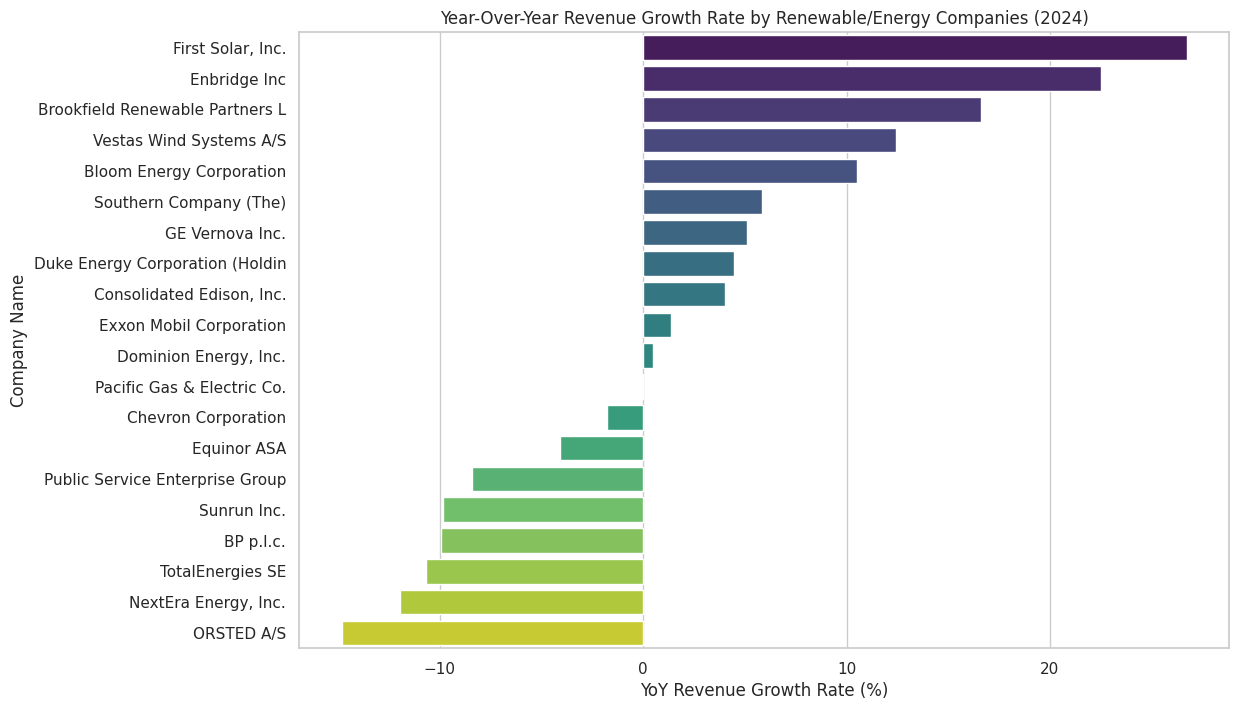

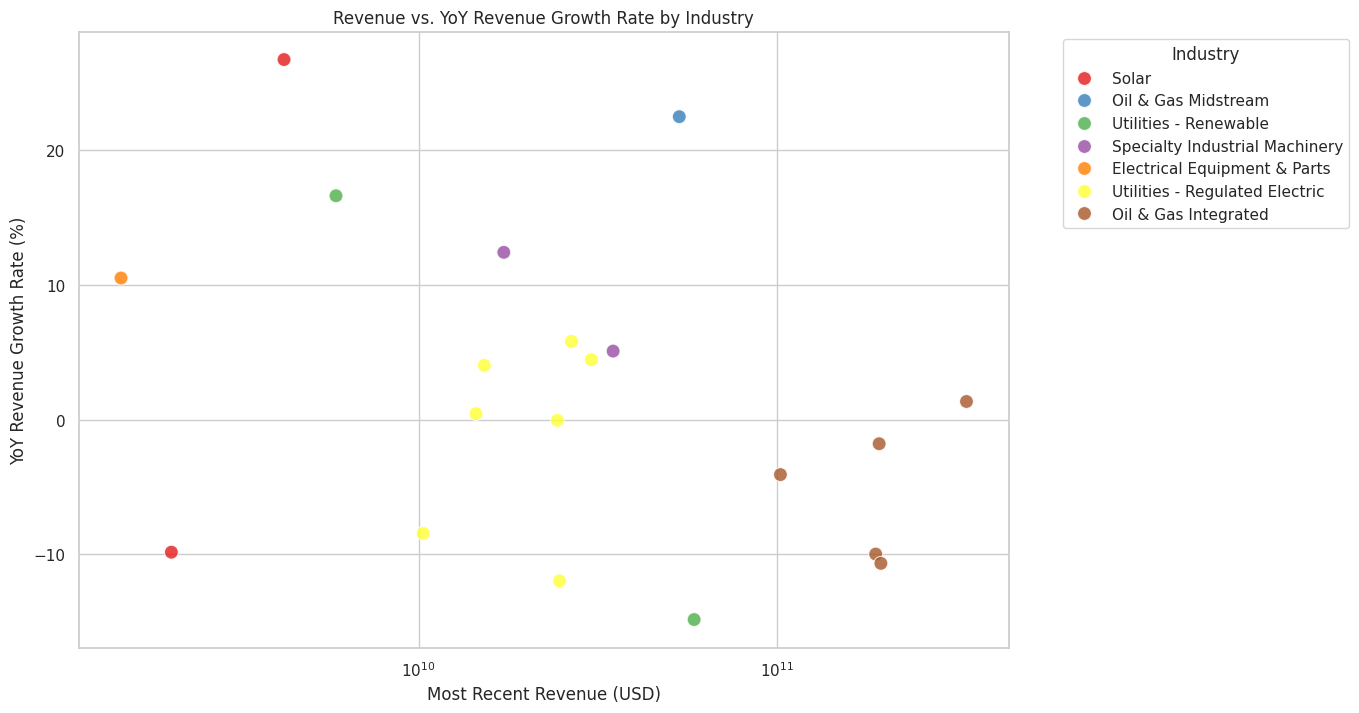

<ipython-input-17-cfded75eb7e7>:81: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




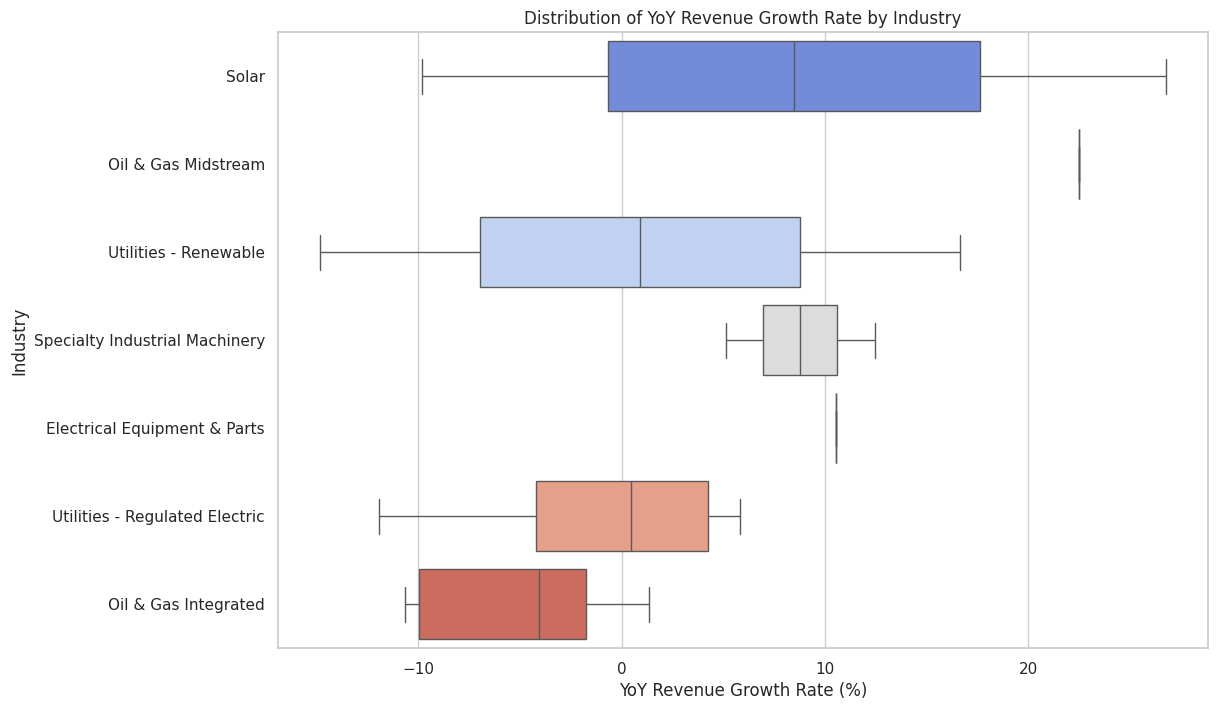

In [17]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up seaborn style for advanced visualization
sns.set(style="whitegrid")

# Sample data preparation (use the data prepared in the previous steps)
companies = [
    'XOM', 'GEV', 'CVX', 'NEE', 'DUK', 'SO', 'ENB', 'BP', 'TTE', 'EQNR',
    'ORSTED.CO', 'VWS.CO', 'ED', 'D', 'PCG', 'PEG', 'BEP', 'BE', 'FSLR', 'RUN'
]

# Initialize a list to store data
data = []

for ticker in companies:
    try:
        stock = yf.Ticker(ticker)
        # Fetch company info for name and industry
        company_info = stock.info
        company_name = company_info.get("shortName", "N/A")
        industry = company_info.get("industry", "N/A")

        # Fetch annual financial data as a DataFrame
        annual_financials = stock.financials

        # Get Revenue for the last two years and the corresponding years
        recent_revenue = annual_financials.loc['Total Revenue'][:2]
        recent_years = recent_revenue.index[:2]

        # Calculate Revenue Growth Rate if there are at least two years of data
        if len(recent_revenue) >= 2:
            revenue_growth_rate = ((recent_revenue.iloc[0] - recent_revenue.iloc[1]) / recent_revenue.iloc[1]) * 100
        else:
            revenue_growth_rate = None

        # Append to data list
        data.append({
            'Ticker': ticker,
            'Company Name': company_name,
            'Industry': industry,
            'Most Recent Revenue': recent_revenue.iloc[0] if len(recent_revenue) > 0 else None,
            'Previous Year Revenue': recent_revenue.iloc[1] if len(recent_revenue) > 1 else None,
            'YoY Revenue Growth Rate (%)': revenue_growth_rate
        })

    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# Convert data to DataFrame
df = pd.DataFrame(data)

# Drop rows with missing growth rates for visualizations
df = df.dropna(subset=['YoY Revenue Growth Rate (%)'])

# Sort by 'YoY Revenue Growth Rate (%)' in descending order
df = df.sort_values(by='YoY Revenue Growth Rate (%)', ascending=False)

### Visualization 1: Bar Chart of YoY Revenue Growth Rate
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='YoY Revenue Growth Rate (%)', y='Company Name', palette="viridis")
plt.title('Year-Over-Year Revenue Growth Rate by Renewable/Energy Companies (2024)')
plt.xlabel('YoY Revenue Growth Rate (%)')
plt.ylabel('Company Name')
plt.show()

### Visualization 2: Scatter Plot of Revenue vs. YoY Growth Rate
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Most Recent Revenue', y='YoY Revenue Growth Rate (%)', hue='Industry', palette="Set1", s=100, edgecolor="w", alpha=0.8)
plt.title('Revenue vs. YoY Revenue Growth Rate by Industry')
plt.xlabel('Most Recent Revenue (USD)')
plt.ylabel('YoY Revenue Growth Rate (%)')
plt.xscale('log')  # Log scale to manage large revenue range
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Visualization 3: Box Plot of YoY Revenue Growth by Industry
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='YoY Revenue Growth Rate (%)', y='Industry', palette="coolwarm")
plt.title('Distribution of YoY Revenue Growth Rate by Industry')
plt.xlabel('YoY Revenue Growth Rate (%)')
plt.ylabel('Industry')
plt.show()